## 实验二：线性回归与房价预测

### 实验目的
1. 掌握**线性回归模型**的基本原理与实现方法  
2. 学习**数据预处理**与**模型评估**的完整流程  
3. 熟悉`scikit-learn`库的：
   - 数据加载与分割  
   - 模型训练与预测  
   - 性能评估指标计算  
4. 理解**单变量线性回归**与**多变量回归**的差异

### 实验内容
- **数据集**：加利福尼亚房价数据集（`fetch_california_housing`）  
- **核心任务**：
  1. 完成单变量（如`MedInc`）线性回归建模  
  2. 扩展至多变量（选择3-5个特征）回归分析  
  3. 对比不同特征选择的模型性能差异  
- **技术重点**：
  ```python
  # 关键代码片段示例
  from sklearn.linear_model import LinearRegression
  model = LinearRegression()
  model.fit(X_train, y_train)

# 加利福尼亚房价数据集（California Housing Dataset）详解

## 1. 数据集背景
- **来源**: 1990年美国人口普查数据（scikit-learn内置数据集）
- **用途**: 回归任务预测房屋价格中位数（单位：10万美元）
- **特点**: 包含地理坐标（经纬度）和人口统计特征
- 加载方式：
  ```python
  from sklearn.datasets import fetch_california_housing
  housing = fetch_california_housing()

# 加利福尼亚房价数据集结构与特征说明

## 数据结构表
| 属性          | 说明                             |
|---------------|----------------------------------|
| **数据来源**  | `sklearn.datasets.fetch_california_housing` |
| **样本数量**  | 20,640                          |
| **特征数量**  | 8个数值特征 + 2个隐含地理特征    |
| **目标变量**  | `MedHouseVal`（房价中位数）      |
| **缺失值**    | 无（已预处理）                   |
| **特征类型**  | 全部为浮点型数值                 |

---

## 特征描述表
| 特征名       | 描述                          | 单位  | 数值范围       | 缺失值 | 与房价相关性 |
|--------------|-------------------------------|-------|----------------|--------|--------------|
| **MedInc**   | 区域收入中位数                | 万美元 | 0.5 ~ 15      | 无     | 强正相关     |
| **HouseAge** | 房屋年龄中位数                | 年    | 1 ~ 52         | 无     | 弱正相关     |
| **AveRooms** | 每户平均房间数                | 个    | 0.8 ~ 141      | 无     | 中等正相关   |
| **AveBedrms**| 每户平均卧室数                | 个    | 0.3 ~ 34       | 无     | 中等正相关   |
| **Population**| 区域人口总数                 | 人    | 3 ~ 35,682     | 无     | 弱负相关     |
| **AveOccup** | 每户平均居住人数              | 人    | 0.7 ~ 1,243    | 无     | 强负相关     |
| **Latitude** | 纬度坐标                      | 度    | 32.5 ~ 41.9    | 无     | 空间特征     |
| **Longitude**| 经度坐标                      | 度    | -124.3 ~ -114.5| 无     | 空间特征     |

### 补充说明
1. **目标变量** `MedHouseVal`：  
   - 表示房屋价格中位数，已按10万美元为单位标准化  
   - 实际范围：$15,000 ~ $500,000（对应0.15 ~ 5.0）

2. **地理特征**：  
   - 经纬度组合可映射到加州具体区域（需地理编码转换）  
   - 隐含空间模式（如沿海地区房价显著更高）

3. **数据关系**：  
   - `AveRooms`与`AveBedrms`相关系数达0.85（需防多重共线性）  
   - `MedInc`对房价解释力最强（皮尔逊系数≈0.7）

MSE: 0.71
系数: 0.42, 截距: 0.45


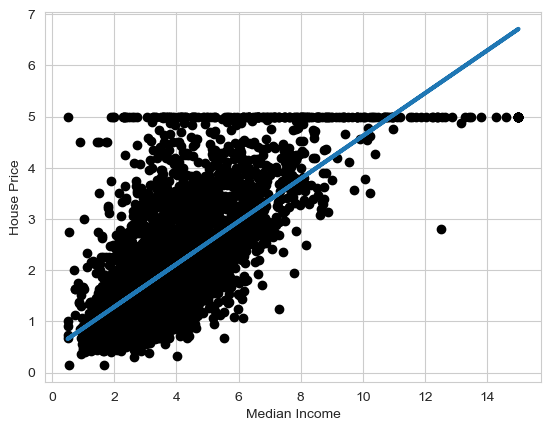

In [1]:
# 导入库
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# 数据加载与探索
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target

# 选择特征（示例使用'MedInc'）
X = df[['MedInc']].values
y = df['Price'].values

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 模型训练
model = LinearRegression()
model.fit(X_train, y_train)

# 预测与评估
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"系数: {model.coef_[0]:.2f}, 截距: {model.intercept_:.2f}")

# 可视化（需matplotlib）
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, linewidth=3)
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show()

### 思考题：选择不同特征带入模型对模型预测性能会有怎样的影响？
强相关特征：如果选择与目标变量（房价中位数 MedHouseVal）强相关的特征（如 MedInc），模型能够更好地捕捉数据中的模式从而提高预测性能。
弱相关或无关特征：如果选择与目标变量弱相关或无关的特征（如 AveOccup），可能会引入噪声，导致模型性能下降。

#### 区域人口总数与房价进行回归预测

MSE: 1.370180990267466
系数: -0.000025, 截距: 2.098428


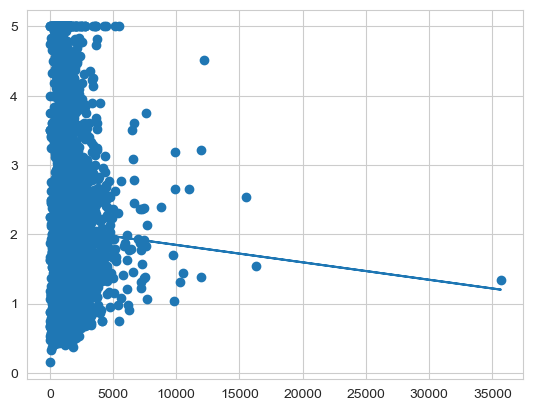

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target    # 将目标变量加入df中

# 描述区域人口总数与价格之间的关系
X = df['Population'].values.reshape(-1,1)
y = df['Price'].values


X_train,X_text,y_train,y_text = train_test_split(X,y,test_size=0.2)

# 模型训练
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_text)
print(f'MSE: {mean_squared_error(y_text,y_pred)}')
print(f"系数: {model.coef_[0]:.6f}, 截距: {model.intercept_:.6f}")

# 可视化
plt.scatter(X_text,y_text)
plt.plot(X_text,y_pred)
plt.show()

<Axes: >

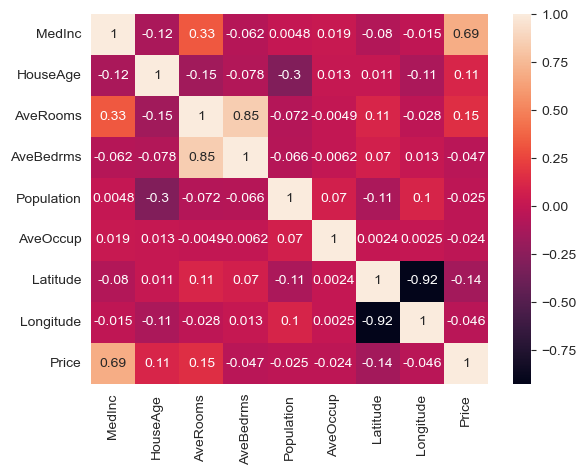

In [3]:
# 导入热力图
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

#### 对HouseAge和Price做回归

MSE:1.323138093847738
系数:0.010058, 截距:1.780505


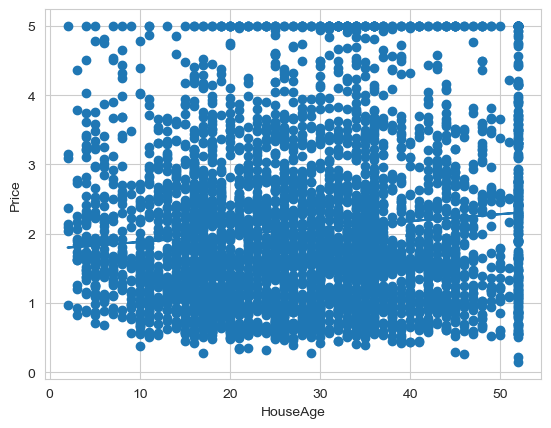

In [4]:
## 导入数据集
X = df['HouseAge'].values.reshape(-1,1)
y = df['Price'].values

# 分割数据
X_train,X_text,y_train,y_text = train_test_split(X,y,test_size=0.2)

# 模型训练
model = LinearRegression()
model.fit(X_train,y_train)

# 模型预测
y_pred = model.predict(X_text)

# 输出MSE
print(f"MSE:{mean_squared_error(y_text,y_pred)}")
# 输出系数
print(f"系数:{model.coef_[0]:.6f}, 截距:{model.intercept_:.6f}")

# 数据可视化
plt.scatter(X_text,y_text)
plt.plot(X_text,y_pred)
plt.xlabel('HouseAge')
plt.ylabel('Price')
plt.show()